# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


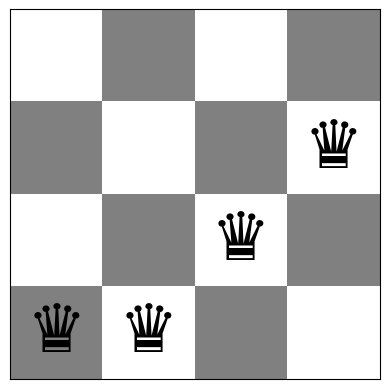

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


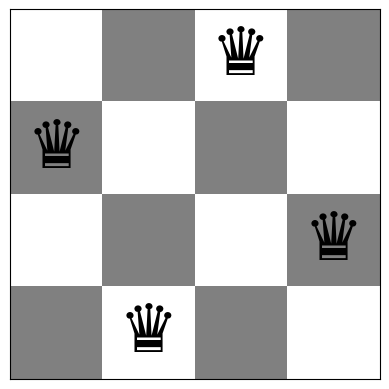

In [ ]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [ ]:
import numpy as np

def steepest_ascent_hill_climbing(board, max_steps=1000):
    """
    Thực hiện thuật toán Steepest-Ascent Hill Climbing cho bài toán n-Queens.
    Trả về (best_board, num_conflicts, num_steps)
    """

    n = len(board)
    current = board.copy()
    current_conflicts = conflicts(current)

    for step in range(max_steps):
        # tạo danh sách tất cả các bước di chuyển hợp lệ
        moves = []
        for col in range(n):
            for row in range(n):
                if row != current[col]:
                    new_board = current.copy()
                    new_board[col] = row
                    moves.append((new_board, conflicts(new_board)))

        # tìm nước đi có số conflict nhỏ nhất
        best_move, best_conflict = min(moves, key=lambda x: x[1])

        # nếu không có cải thiện thì dừng lại
        if best_conflict >= current_conflicts:
            print(f"Local optimum reached at step {step}. Conflicts: {current_conflicts}")
            return current, current_conflicts, step

        # ngược lại, cập nhật trạng thái
        current, current_conflicts = best_move, best_conflict

    print(f"Max steps reached ({max_steps}). Final conflicts: {current_conflicts}")
    return current, current_conflicts, max_steps


Initial board: [4 4 0 1 7 1 7 1]
Initial conflicts: 8
Local optimum reached at step 5. Conflicts: 0

Final board: [4 6 0 2 7 5 3 1]
Final conflicts: 0
Steps: 5
Board with 0 conflicts.


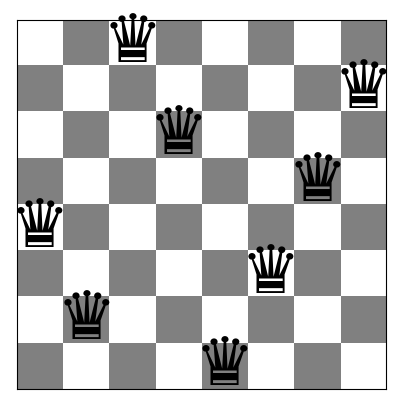

In [ ]:
# thử nghiệm với n = 8
n = 8
board = random_board(n)
print("Initial board:", board)
print("Initial conflicts:", conflicts(board))

best_board, best_conflicts, steps = steepest_ascent_hill_climbing(board)

print("\nFinal board:", best_board)
print("Final conflicts:", best_conflicts)
print("Steps:", steps)

show_board(best_board)


## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [ ]:
import random

def stochastic_hill_climbing(board, max_steps=1000):
    """
    Thực hiện thuật toán Stochastic Hill Climbing cho bài toán n-Queens.
    Ở mỗi bước, chọn ngẫu nhiên 1 nước đi cải thiện.
    Trả về (best_board, num_conflicts, num_steps)
    """

    n = len(board)
    current = board.copy()
    current_conflicts = conflicts(current)

    for step in range(max_steps):
        improving_moves = []

        # Duyệt qua tất cả các nước đi có thể
        for col in range(n):
            for row in range(n):
                if row != current[col]:
                    new_board = current.copy()
                    new_board[col] = row
                    new_conflicts = conflicts(new_board)

                    # Nếu cải thiện thì lưu lại
                    if new_conflicts < current_conflicts:
                        improving_moves.append((new_board, new_conflicts))

        # Nếu không có nước đi cải thiện -> đạt local optimum
        if not improving_moves:
            print(f"Local optimum reached at step {step}. Conflicts: {current_conflicts}")
            return current, current_conflicts, step

        # Chọn ngẫu nhiên một nước đi trong nhóm cải thiện
        next_board, next_conflicts = random.choice(improving_moves)

        # Cập nhật trạng thái hiện tại
        current, current_conflicts = next_board, next_conflicts

    print(f"Max steps reached ({max_steps}). Final conflicts: {current_conflicts}")
    return current, current_conflicts, max_steps


Initial board: [2 6 3 6 4 4 2 6]
Initial conflicts: 8
Local optimum reached at step 5. Conflicts: 1

Final board: [2 6 3 0 7 4 0 5]
Final conflicts: 1
Steps: 5
Board with 1 conflicts.


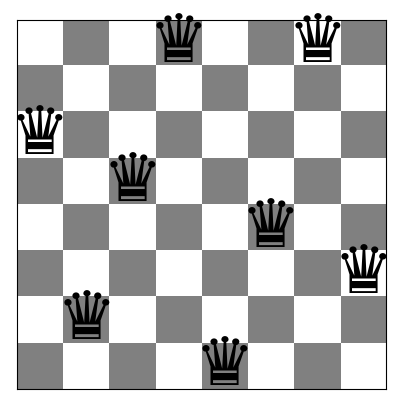

In [ ]:
n = 8
board = random_board(n)
print("Initial board:", board)
print("Initial conflicts:", conflicts(board))

best_board, best_conflicts, steps = stochastic_hill_climbing(board)

print("\nFinal board:", best_board)
print("Final conflicts:", best_conflicts)
print("Steps:", steps)

show_board(best_board)


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [ ]:
import random

def first_choice_hill_climbing(board, max_steps=10000, max_tries_without_improvement=200):
    """
    First-choice (stochastic) hill climbing cho bài toán n-Queens.
    Ở mỗi bước:
        - Sinh ngẫu nhiên 1 nước đi cục bộ
        - Nếu cải thiện (conflicts giảm) thì chấp nhận
        - Nếu không cải thiện, thử lại
    Dừng khi không cải thiện sau 'max_tries_without_improvement' lần thử
    """

    n = len(board)
    current = board.copy()
    current_conflicts = conflicts(current)

    tries_since_improvement = 0

    for step in range(max_steps):
        # Sinh ngẫu nhiên 1 nước đi (chọn 1 cột và 1 hàng khác)
        col = random.randint(0, n - 1)
        new_row = random.randint(0, n - 1)

        # Bỏ qua nếu trùng hàng hiện tại
        if new_row == current[col]:
            continue

        # Tạo trạng thái mới
        new_board = current.copy()
        new_board[col] = new_row
        new_conflicts = conflicts(new_board)

        # Nếu cải thiện thì chấp nhận ngay
        if new_conflicts < current_conflicts:
            current = new_board
            current_conflicts = new_conflicts
            tries_since_improvement = 0  # reset bộ đếm
        else:
            tries_since_improvement += 1

        # Dừng nếu không cải thiện trong một số lần thử
        if tries_since_improvement >= max_tries_without_improvement:
            print(f"Local optimum reached after {step} steps. Conflicts: {current_conflicts}")
            return current, current_conflicts, step

        # Nếu đạt lời giải hoàn hảo thì dừng ngay
        if current_conflicts == 0:
            print(f"Solution found after {step} steps!")
            return current, current_conflicts, step

    print(f"Max steps reached ({max_steps}). Final conflicts: {current_conflicts}")
    return current, current_conflicts, max_steps


Initial board: [2 0 0 4 5 0 1 7]
Initial conflicts: 7
Local optimum reached after 386 steps. Conflicts: 1

Final board: [2 4 6 0 5 3 1 7]
Final conflicts: 1
Steps: 386
Board with 1 conflicts.


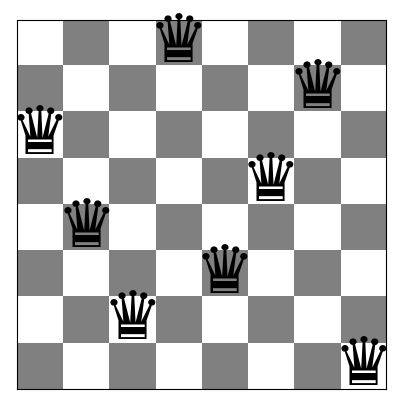

In [ ]:
n = 8
board = random_board(n)
print("Initial board:", board)
print("Initial conflicts:", conflicts(board))

best_board, best_conflicts, steps = first_choice_hill_climbing(board)

print("\nFinal board:", best_board)
print("Final conflicts:", best_conflicts)
print("Steps:", steps)

show_board(best_board)


## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [ ]:
def hill_climbing_with_random_restarts(n, hill_climb_func, restarts=100, max_steps=1000):
    """
    Chạy một thuật toán Hill Climbing với khởi tạo ngẫu nhiên lại nhiều lần.
    hill_climb_func: 1 trong 3 hàm hill climbing (steepest, stochastic, first-choice)
    restarts: số lần khởi tạo lại tối đa
    Trả về nghiệm tốt nhất tìm được.
    """

    best_board = None
    best_conflicts = float('inf')
    total_steps = 0

    for i in range(restarts):
        board = random_board(n)
        result_board, result_conflicts, steps = hill_climb_func(board, max_steps=max_steps)
        total_steps += steps

        print(f"Restart {i+1}: Conflicts = {result_conflicts}")

        if result_conflicts < best_conflicts:
            best_conflicts = result_conflicts
            best_board = result_board

        # nếu tìm được nghiệm hoàn hảo thì dừng ngay
        if best_conflicts == 0:
            print(f" Found optimal solution at restart {i+1}")
            break

    print(f"\nBest conflicts found: {best_conflicts}")
    print(f"Average steps per restart: {total_steps / (i+1):.2f}")
    return best_board, best_conflicts


=== Steepest-Ascent Hill Climbing with Random Restarts ===
Local optimum reached at step 2. Conflicts: 2
Restart 1: Conflicts = 2
Local optimum reached at step 4. Conflicts: 1
Restart 2: Conflicts = 1
Local optimum reached at step 3. Conflicts: 2
Restart 3: Conflicts = 2
Local optimum reached at step 3. Conflicts: 1
Restart 4: Conflicts = 1
Local optimum reached at step 2. Conflicts: 1
Restart 5: Conflicts = 1
Local optimum reached at step 4. Conflicts: 1
Restart 6: Conflicts = 1
Local optimum reached at step 4. Conflicts: 1
Restart 7: Conflicts = 1
Local optimum reached at step 3. Conflicts: 1
Restart 8: Conflicts = 1
Local optimum reached at step 3. Conflicts: 2
Restart 9: Conflicts = 2
Local optimum reached at step 4. Conflicts: 2
Restart 10: Conflicts = 2
Local optimum reached at step 4. Conflicts: 2
Restart 11: Conflicts = 2
Local optimum reached at step 2. Conflicts: 2
Restart 12: Conflicts = 2
Local optimum reached at step 5. Conflicts: 1
Restart 13: Conflicts = 1
Local optimum 

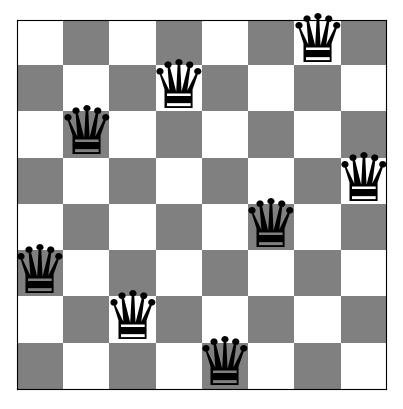

In [ ]:
print("=== Steepest-Ascent Hill Climbing with Random Restarts ===")
best_board, best_conflicts = hill_climbing_with_random_restarts(
    n=8, hill_climb_func=steepest_ascent_hill_climbing, restarts=100)
show_board(best_board)


=== Stochastic Hill Climbing with Random Restarts ===
Local optimum reached at step 5. Conflicts: 0
Restart 1: Conflicts = 0
 Found optimal solution at restart 1

Best conflicts found: 0
Average steps per restart: 5.00
Board with 0 conflicts.


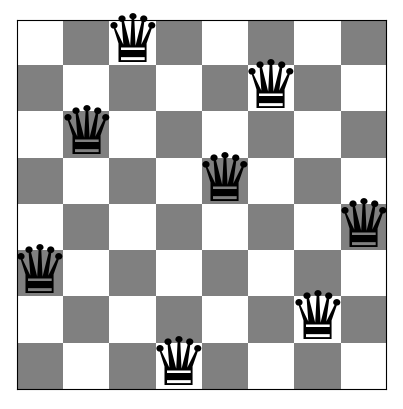

In [ ]:
print("=== Stochastic Hill Climbing with Random Restarts ===")
best_board, best_conflicts = hill_climbing_with_random_restarts(
    n=8, hill_climb_func=stochastic_hill_climbing, restarts=100)
show_board(best_board)


=== First-Choice Hill Climbing with Random Restarts ===
Local optimum reached after 240 steps. Conflicts: 2
Restart 1: Conflicts = 2
Local optimum reached after 284 steps. Conflicts: 1
Restart 2: Conflicts = 1
Local optimum reached after 269 steps. Conflicts: 1
Restart 3: Conflicts = 1
Local optimum reached after 265 steps. Conflicts: 1
Restart 4: Conflicts = 1
Local optimum reached after 254 steps. Conflicts: 2
Restart 5: Conflicts = 2
Local optimum reached after 365 steps. Conflicts: 1
Restart 6: Conflicts = 1
Local optimum reached after 288 steps. Conflicts: 1
Restart 7: Conflicts = 1
Solution found after 80 steps!
Restart 8: Conflicts = 0
 Found optimal solution at restart 8

Best conflicts found: 0
Average steps per restart: 255.62
Board with 0 conflicts.


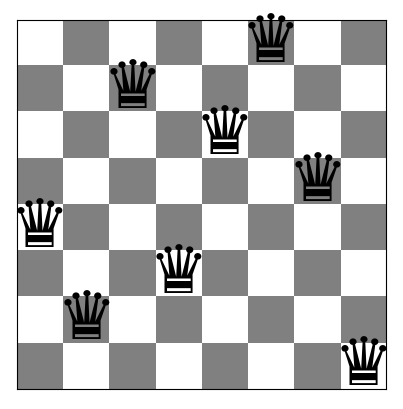

In [ ]:
print("=== First-Choice Hill Climbing with Random Restarts ===")
best_board, best_conflicts = hill_climbing_with_random_restarts(
    n=8, hill_climb_func=first_choice_hill_climbing, restarts=100)
show_board(best_board)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def simulated_annealing(board, max_steps=10000, T_start=1.0, T_end=0.001, alpha=0.99):
    """
    Thực hiện thuật toán Simulated Annealing cho bài toán n-Queens
    board: trạng thái khởi tạo (list các hàng của quân hậu)
    max_steps: số bước tối đa
    T_start: nhiệt độ ban đầu
    T_end: nhiệt độ kết thúc
    alpha: hệ số giảm nhiệt (annealing schedule)
    """
    current = board[:]
    current_conflicts = conflicts(current)
    T = T_start
    conflicts_history = [current_conflicts]

    for step in range(max_steps):
        if current_conflicts == 0:
            print(f" Found solution at step {step}")
            break

        # Giảm nhiệt độ
        T = max(T_end, T * alpha)

        # Sinh một trạng thái láng giềng (move 1 queen)
        col = random.randint(0, len(board) - 1)
        row = random.randint(0, len(board) - 1)
        neighbor = current[:]
        neighbor[col] = row

        new_conflicts = conflicts(neighbor)
        deltaE = new_conflicts - current_conflicts

        # Quyết định chấp nhận
        if deltaE < 0 or random.random() < math.exp(-deltaE / T):
            current = neighbor
            current_conflicts = new_conflicts

        conflicts_history.append(current_conflicts)

    return current, current_conflicts, conflicts_history


Final board: [6 5 6 3 0 7 3 1]
Conflicts: 2
Board with 7 conflicts.


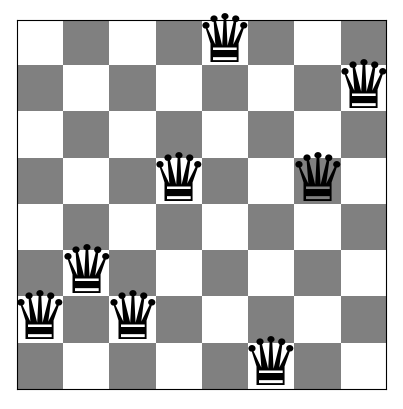

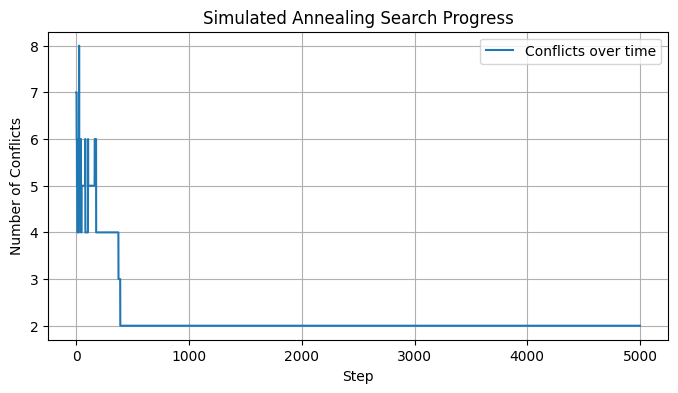

In [ ]:
# Thử nghiệm với n = 8
n = 8
board = random_board(n)

result_board, result_conflicts, history = simulated_annealing(
    board, max_steps=5000, T_start=1.0, T_end=0.001, alpha=0.995
)

# Hiển thị kết quả cuối
print("Final board:", result_board)
print("Conflicts:", result_conflicts)
show_board(result_board)

# Vẽ biểu đồ biến thiên số xung đột
plt.figure(figsize=(8,4))
plt.plot(history, label='Conflicts over time')
plt.xlabel('Step')
plt.ylabel('Number of Conflicts')
plt.title('Simulated Annealing Search Progress')
plt.legend()
plt.grid(True)
plt.show()


## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [ ]:
import time
import numpy as np

def evaluate_algorithm(algorithm, n, runs=100):
    times = []
    conflicts_list = []
    success = 0

    for _ in range(runs):
        board = random_board(n)
        start = time.time()

        # Tùy vào thuật toán, gọi hàm phù hợp
        if algorithm == "steepest":
            final_board, final_conflicts, steps = steepest_ascent_hill_climbing(board)
        elif algorithm == "stochastic1":
            final_board, final_conflicts, steps = stochastic_hill_climbing(board)
        elif algorithm == "stochastic2":
            final_board, final_conflicts, steps = first_choice_hill_climbing(board)
        elif algorithm == "annealing":
            final_board, final_conflicts, _ = simulated_annealing(board)
        else:
            raise ValueError("Unknown algorithm")

        end = time.time()
        times.append(end - start)
        conflicts_list.append(final_conflicts)
        if final_conflicts == 0:
            success += 1

    avg_time = np.mean(times)
    avg_conflicts = np.mean(conflicts_list)
    success_rate = 100 * success / runs

    return avg_time, avg_conflicts, success_rate


# So sánh tất cả
algorithms = {
    "Steepest asc. HC": "steepest",
    "Stochastic HC 1": "stochastic1",
    "Stochastic HC 2": "stochastic2",
    "Simulated Annealing": "annealing"
}

results = []

for n in [4, 8]:
    print(f"\n=== Board size {n} ===")
    for name, key in algorithms.items():
        avg_time, avg_conflicts, success_rate = evaluate_algorithm(key, n, runs=100)
        results.append((name, n, avg_time, avg_conflicts, success_rate))
        print(f"{name:20s} | Avg Time: {avg_time:.4f}s | Avg Conflicts: {avg_conflicts:.2f} | Success: {success_rate:.1f}%")


=== Board size 4 ===
Local optimum reached at step 0. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 0
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 0
Local optimum reached at step 2. Conflicts: 0
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 2. Conflicts: 0
Local optimum reached at step 0. Conflicts: 1
Local optimum reached at step 1. Conflicts: 0
Local optimum reached at step 1. Conflicts: 0
Local optimum reached at step 3. Conflicts: 0
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 3. Conflicts: 0
Local optimum reached at step 2. Conflicts: 0
Local optimu

### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

Initial board: [7 5 0 0 1 5 0 1]
Initial conflicts: 8
Local optimum reached at step 3. Conflicts: 2
Local optimum reached at step 6. Conflicts: 1
Local optimum reached after 247 steps. Conflicts: 3


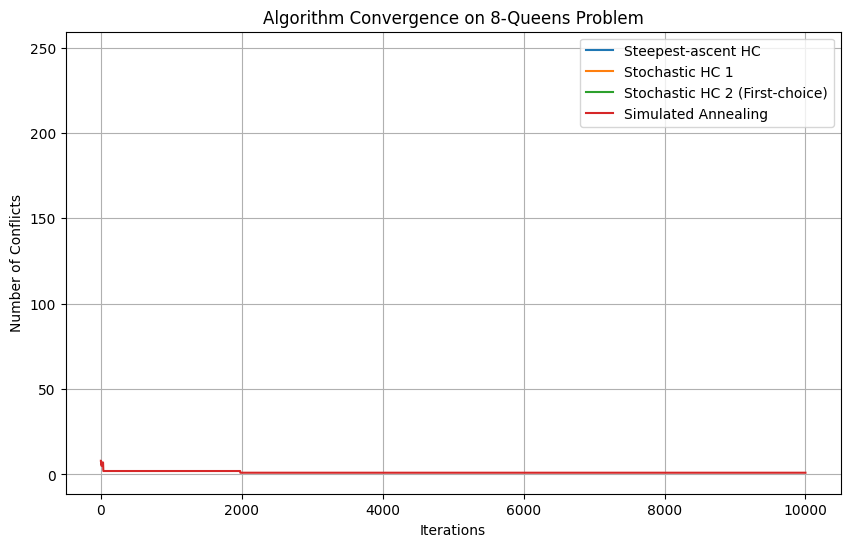

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# HÀM MINH HỌA QUÁ TRÌNH HỘI TỤ
# ==============================

def visualize_convergence(n=8):
    """Chạy 4 thuật toán trên cùng một board và vẽ biểu đồ hội tụ."""

    # Tạo board ngẫu nhiên ban đầu
    board = random_board(n)
    print("Initial board:", board)
    print("Initial conflicts:", conflicts(board))

    # Chạy từng thuật toán và lấy lịch sử hội tụ (số lượng conflict qua mỗi bước)
    b1, f1, h1 = steepest_ascent_hill_climbing(board.copy())
    b2, f2, h2 = stochastic_hill_climbing(board.copy())
    b3, f3, h3 = first_choice_hill_climbing(board.copy())
    b4, f4, h4 = simulated_annealing(board.copy())

    # Vẽ biểu đồ hội tụ
    plt.figure(figsize=(10,6))
    plt.plot(h1, label="Steepest-ascent HC")
    plt.plot(h2, label="Stochastic HC 1")
    plt.plot(h3, label="Stochastic HC 2 (First-choice)")
    plt.plot(h4, label="Simulated Annealing")
    plt.xlabel("Iterations")
    plt.ylabel("Number of Conflicts")
    plt.title(f"Algorithm Convergence on {n}-Queens Problem")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "Steepest": (b1, f1),
        "Stochastic1": (b2, f2),
        "Stochastic2": (b3, f3),
        "Annealing": (b4, f4)
    }


# Gọi minh họa với n=8
results = visualize_convergence(8)


### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

Running for n=4 ...
Local optimum reached at step 1. Conflicts: 2
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 2. Conflicts: 0
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 2. Conflicts: 0
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 2. Conflicts: 0
Local optimum reached at step 1. Conflicts: 0
Local optimum reached at step 1. Conflicts: 0
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 2. Conflicts: 0
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 2. Conflicts: 1
Local optimum reached at step 0. Conflicts: 1
Local optimum reached at step 1. Conflicts: 1
Local optimum reached at step 1. Conflicts: 0
 Found solution at step 154
 Found solution at step 71
 Foun

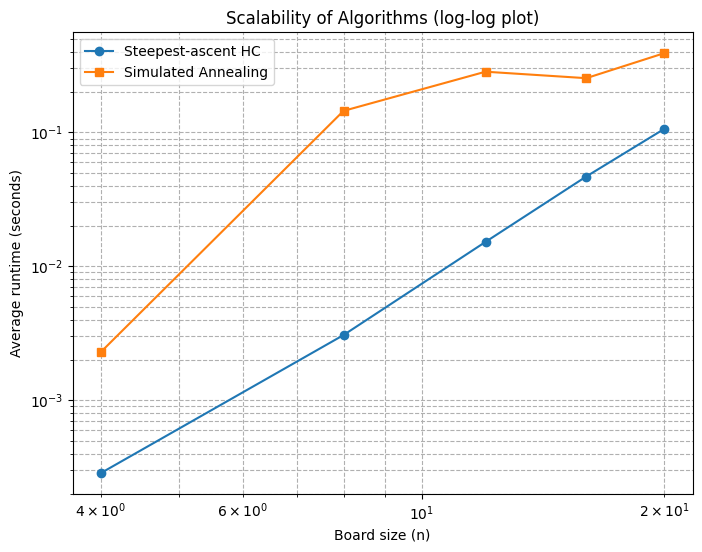

Estimated complexity:
  Steepest-ascent HC: O(n^3.70)
  Simulated Annealing: O(n^3.07)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ---------------------------
# Hàm đo thời gian trung bình
# ---------------------------

def average_runtime(algorithm_func, n, runs=20):
    """Chạy thuật toán nhiều lần và trả về thời gian chạy trung bình."""
    times = []
    for _ in range(runs):
        board = random_board(n)
        start = time.time()
        algorithm_func(board)
        times.append(time.time() - start)
    return np.mean(times)


# ---------------------------
# So sánh các thuật toán
# ---------------------------

sizes = [4, 8, 12, 16, 20]
times_steepest = []
times_annealing = []

for n in sizes:
    print(f"Running for n={n} ...")
    t1 = average_runtime(steepest_ascent_hill_climbing, n)
    t2 = average_runtime(simulated_annealing, n)
    times_steepest.append(t1)
    times_annealing.append(t2)

# ---------------------------
# Vẽ biểu đồ log-log
# ---------------------------

plt.figure(figsize=(8,6))
plt.loglog(sizes, times_steepest, marker='o', label='Steepest-ascent HC')
plt.loglog(sizes, times_annealing, marker='s', label='Simulated Annealing')
plt.xlabel("Board size (n)")
plt.ylabel("Average runtime (seconds)")
plt.title("Scalability of Algorithms (log-log plot)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# ---------------------------
# Ước lượng độ phức tạp thời gian
# ---------------------------

def estimate_complexity(sizes, times):
    """Tính hệ số xấp xỉ O(n^k) bằng hồi quy log-log."""
    log_n = np.log(sizes)
    log_t = np.log(times)
    k, b = np.polyfit(log_n, log_t, 1)  # slope ~ bậc k
    return k

k1 = estimate_complexity(sizes, times_steepest)
k2 = estimate_complexity(sizes, times_annealing)

print(f"Estimated complexity:")
print(f"  Steepest-ascent HC: O(n^{k1:.2f})")
print(f"  Simulated Annealing: O(n^{k2:.2f})")


## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?


Running Single-step operator on 8-Queens ...

Running Column swap operator on 8-Queens ...

Running Dual-queen operator on 8-Queens ...

Running Adaptive operator on 8-Queens ...

Running Single-step operator on 12-Queens ...

Running Column swap operator on 12-Queens ...

Running Dual-queen operator on 12-Queens ...

Running Adaptive operator on 12-Queens ...


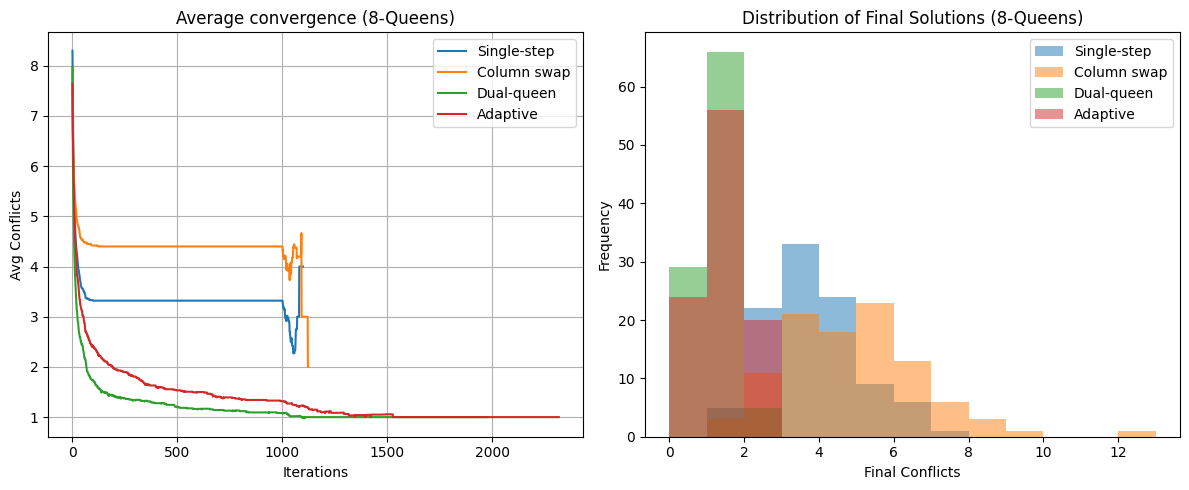


=== Summary for 8-Queens ===
Single-step  | Avg Time: 0.0464s | Success Rate: 0.0%
Column swap  | Avg Time: 0.0353s | Success Rate: 0.0%
Dual-queen   | Avg Time: 0.0563s | Success Rate: 29.0%
Adaptive     | Avg Time: 0.1365s | Success Rate: 24.0%


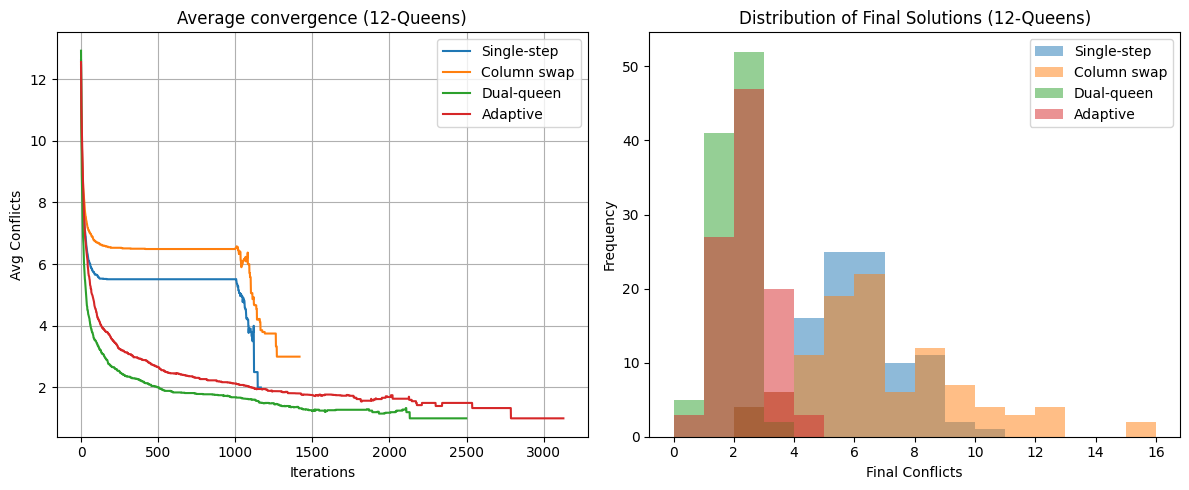


=== Summary for 12-Queens ===
Single-step  | Avg Time: 0.0394s | Success Rate: 0.0%
Column swap  | Avg Time: 0.0498s | Success Rate: 0.0%
Dual-queen   | Avg Time: 0.0826s | Success Rate: 5.0%
Adaptive     | Avg Time: 0.2989s | Success Rate: 3.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ===========================================
# 1. Các hàm hỗ trợ di chuyển (Local Move Operators)
# ===========================================

def single_step_move(board):
    """Di chuyển một hậu lên/xuống 1 ô (nếu có thể)."""
    n = len(board)
    new_board = board.copy()
    col = np.random.randint(0, n)
    direction = np.random.choice([-1, 1])
    new_row = board[col] + direction
    if 0 <= new_row < n:
        new_board[col] = new_row
    return new_board

def column_swap_move(board):
    """Hoán đổi vị trí của 2 cột (đổi chỗ 2 hậu)."""
    n = len(board)
    new_board = board.copy()
    c1, c2 = np.random.choice(n, 2, replace=False)
    new_board[c1], new_board[c2] = new_board[c2], new_board[c1]
    return new_board

def dual_queen_move(board):
    """Di chuyển 2 hậu cùng lúc đến vị trí ngẫu nhiên khác."""
    n = len(board)
    new_board = board.copy()
    c1, c2 = np.random.choice(n, 2, replace=False)
    new_board[c1] = np.random.randint(0, n)
    new_board[c2] = np.random.randint(0, n)
    return new_board

def adaptive_move(board):
    """
    Adaptive operator:
    - 50%: chọn hậu có nhiều xung đột nhất và di chuyển 1 bước (single-step)
    - 25%: hoán đổi 2 cột (column swap)
    - 25%: dual-queen move
    """
    n = len(board)
    probs = np.random.random()
    if probs < 0.5:
        # chọn hậu có nhiều xung đột nhất
        max_conf = -1
        max_col = 0
        for c in range(n):
            temp = board.copy()
            temp_conf = conflicts(temp)
            if temp_conf > max_conf:
                max_conf = temp_conf
                max_col = c
        new_board = board.copy()
        move_dir = np.random.choice([-1, 1])
        new_row = new_board[max_col] + move_dir
        if 0 <= new_row < n:
            new_board[max_col] = new_row
        return new_board
    elif probs < 0.75:
        return column_swap_move(board)
    else:
        return dual_queen_move(board)

# ===========================================
# 2. First-choice hill climbing mở rộng
# ===========================================

def first_choice_hill_climbing_custom(board, move_operator, max_tries=1000):
    """Stochastic Hill Climbing (First-choice) với move operator tùy chọn."""
    current = board.copy()
    current_conflicts = conflicts(current)
    history = [current_conflicts]
    tries = 0

    while tries < max_tries and current_conflicts > 0:
        neighbor = move_operator(current)
        neighbor_conflicts = conflicts(neighbor)

        if neighbor_conflicts < current_conflicts:
            current = neighbor
            current_conflicts = neighbor_conflicts
            tries = 0  # reset vì vừa cải thiện
        else:
            tries += 1
        history.append(current_conflicts)

    return current, current_conflicts, history


# ===========================================
# 3. Thử nghiệm với các move operator khác nhau
# ===========================================

def experiment_local_moves(n=8, runs=100):
    """Chạy thử nghiệm các move operators trên Stochastic HC2."""
    operators = {
        "Single-step": single_step_move,
        "Column swap": column_swap_move,
        "Dual-queen": dual_queen_move,
        "Adaptive": adaptive_move
    }

    results = {}
    for name, move_op in operators.items():
        print(f"\nRunning {name} operator on {n}-Queens ...")
        all_histories = []
        final_conflicts = []
        times = []
        for _ in range(runs):
            board = random_board(n)
            start = time.time()
            final_board, final_conf, hist = first_choice_hill_climbing_custom(board, move_op)
            end = time.time()
            times.append(end - start)
            final_conflicts.append(final_conf)
            all_histories.append(hist)
        results[name] = {
            "histories": all_histories,
            "final_conflicts": final_conflicts,
            "avg_time": np.mean(times)
        }

    return results


# ===========================================
# 4. Chạy thử và trực quan hóa
# ===========================================

results_8 = experiment_local_moves(8)
results_12 = experiment_local_moves(12)

def plot_results(results, n):
    """Vẽ biểu đồ cho các kết quả thực nghiệm."""
    plt.figure(figsize=(12,5))

    # --- Biểu đồ 1: Trung bình quá trình hội tụ ---
    plt.subplot(1,2,1)
    for name, res in results.items():
        max_len = max(len(h) for h in res["histories"])
        avg_hist = np.zeros(max_len)
        count = np.zeros(max_len)
        for h in res["histories"]:
            for i, v in enumerate(h):
                avg_hist[i] += v
                count[i] += 1
        avg_hist = avg_hist / np.maximum(count, 1)
        plt.plot(avg_hist, label=name)
    plt.xlabel("Iterations")
    plt.ylabel("Avg Conflicts")
    plt.title(f"Average convergence ({n}-Queens)")
    plt.legend()
    plt.grid(True)

    # --- Biểu đồ 2: Phân bố kết quả cuối cùng ---
    plt.subplot(1,2,2)
    for name, res in results.items():
        plt.hist(res["final_conflicts"], bins=range(0, max(res["final_conflicts"])+2), alpha=0.5, label=name)
    plt.xlabel("Final Conflicts")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Final Solutions ({n}-Queens)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # In bảng kết quả tổng hợp
    print(f"\n=== Summary for {n}-Queens ===")
    for name, res in results.items():
        success_rate = 100 * np.mean(np.array(res["final_conflicts"]) == 0)
        print(f"{name:12s} | Avg Time: {res['avg_time']:.4f}s | Success Rate: {success_rate:.1f}%")

# Vẽ biểu đồ cho n=8 và n=12
plot_results(results_8, 8)
plot_results(results_12, 12)


## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

Gen    0 | best_conflicts = 11 | avg_conflicts = 21.90
Gen   50 | best_conflicts = 5 | avg_conflicts = 16.76
Gen  100 | best_conflicts = 4 | avg_conflicts = 16.19
Gen  150 | best_conflicts = 3 | avg_conflicts = 15.05
Gen  200 | best_conflicts = 2 | avg_conflicts = 15.78
Gen  250 | best_conflicts = 2 | avg_conflicts = 14.51
Gen  300 | best_conflicts = 2 | avg_conflicts = 14.37
Gen  350 | best_conflicts = 2 | avg_conflicts = 14.70
Gen  400 | best_conflicts = 2 | avg_conflicts = 14.32
Gen  450 | best_conflicts = 2 | avg_conflicts = 14.55
Gen  500 | best_conflicts = 2 | avg_conflicts = 15.06
Gen  550 | best_conflicts = 2 | avg_conflicts = 13.98
Gen  600 | best_conflicts = 2 | avg_conflicts = 14.78
Gen  650 | best_conflicts = 2 | avg_conflicts = 14.85
Gen  700 | best_conflicts = 2 | avg_conflicts = 14.22
Gen  750 | best_conflicts = 2 | avg_conflicts = 14.18
Gen  800 | best_conflicts = 2 | avg_conflicts = 14.63
Gen  850 | best_conflicts = 2 | avg_conflicts = 14.44
Gen  900 | best_conflicts =

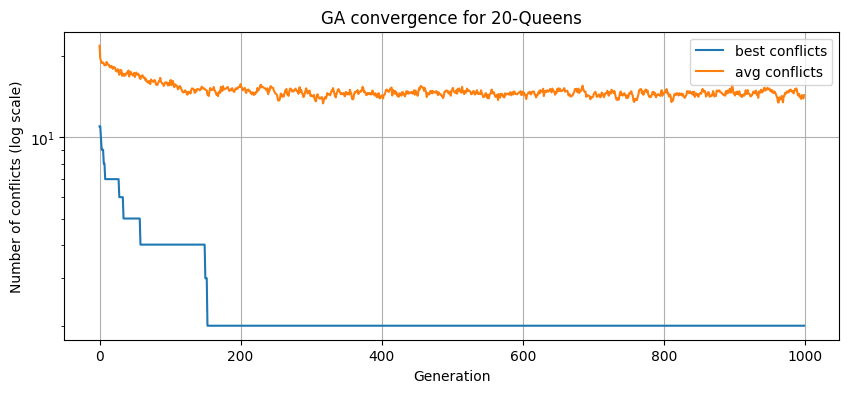

In [ ]:
# Genetic Algorithm for n-Queens (ready-to-run)
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# ---- helpers (conflicts, random board) ----
def comb2(n):
    return n*(n-1)//2

def conflicts(board):
    """Số xung đột trên board (board: list of row positions, one queen per column)."""
    n = len(board)
    horizontal_cnt = [0]*n
    diag1 = [0]*(2*n)
    diag2 = [0]*(2*n)
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diag1[i + board[i]] += 1
        diag2[i - board[i] + n] += 1
    return sum(map(comb2, horizontal_cnt + diag1 + diag2))

def random_board(n):
    """Một cá thể: mỗi cột 1 hậu, vị trí hàng ngẫu nhiên."""
    return list(np.random.randint(0, n, size=n))

# ---- GA components ----
def fitness(board):
    """Fitness: đóng vai trò lớn hơn khi xung đột ít hơn.
       Ta trả về giá trị không âm, lớn hơn khi ít conflicts.
       Ví dụ: max_conflicts - conflicts so that fitness tăng khi conflicts giảm.
    """
    n = len(board)
    max_conflicts = comb2(n)*3  # upper bound rough
    return max_conflicts - conflicts(board)

def tournament_selection(pop, pop_fitness, k=3):
    """Chọn 1 cá thể bằng tournament size k."""
    idxs = random.sample(range(len(pop)), k)
    best = max(idxs, key=lambda i: pop_fitness[i])
    return pop[best][:]  # return a copy

def order_preserving_crossover(parent1, parent2):
    """
    Vì biểu diễn của chúng ta là 'one queen per column' nhưng hàng có thể trùng,
    ta dùng crossover kiểu: chọn một điểm cắt và kết hợp giữ cột như nguyên thủy
    => ở đây chúng ta thực hiện crossover per-column: với prob 0.5 lấy gen từ parent1,
    khác lấy parent2. Đơn giản nhưng hiệu quả.
    """
    n = len(parent1)
    child = [None]*n
    for i in range(n):
        if random.random() < 0.5:
            child[i] = parent1[i]
        else:
            child[i] = parent2[i]
    # nếu muốn, có thể repair; nhưng không cần vì bất kỳ giá trị 0..n-1 đều hợp lệ
    return child

def swap_mutation(board, mutation_rate=0.1):
    """Mutation: với xác suất mutation_rate đổi vị trí hàng của một cột sang giá trị ngẫu nhiên."""
    n = len(board)
    child = board[:]
    for i in range(n):
        if random.random() < mutation_rate:
            child[i] = random.randrange(0, n)
    return child

# ---- GA main routine ----
def genetic_algorithm(n,
                      pop_size=200,
                      generations=500,
                      crossover_rate=0.8,
                      mutation_rate=0.1,
                      elite_size=2,
                      tournament_k=3,
                      seed=1234,
                      verbose=False):
    """
    Trả về: best_board, best_conflicts, history (best_conflicts per generation)
    """
    random.seed(seed)
    np.random.seed(seed)

    # init population
    pop = [random_board(n) for _ in range(pop_size)]
    pop_fitness = [fitness(ind) for ind in pop]

    history_best = []
    history_avg = []

    start_time = time.time()
    for gen in range(generations):
        # compute stats
        best_idx = int(np.argmax(pop_fitness))
        best = pop[best_idx]
        best_conf = conflicts(best)
        avg_conf = np.mean([conflicts(ind) for ind in pop])
        history_best.append(best_conf)
        history_avg.append(avg_conf)

        if verbose and gen % 50 == 0:
            print(f"Gen {gen:4d} | best_conflicts = {best_conf} | avg_conflicts = {avg_conf:.2f}")

        # termination if perfect
        if best_conf == 0:
            if verbose: print(f"Solved at generation {gen}")
            break

        # create new population with elitism
        new_pop = []
        # keep elites (by fitness)
        sorted_idx = sorted(range(len(pop)), key=lambda i: pop_fitness[i], reverse=True)
        for i in range(elite_size):
            new_pop.append(pop[sorted_idx[i]].copy())

        # generate rest by selection, crossover, mutation
        while len(new_pop) < pop_size:
            # selection
            parent1 = tournament_selection(pop, pop_fitness, k=tournament_k)
            parent2 = tournament_selection(pop, pop_fitness, k=tournament_k)
            # crossover
            if random.random() < crossover_rate:
                child = order_preserving_crossover(parent1, parent2)
            else:
                child = parent1.copy()
            # mutation
            child = swap_mutation(child, mutation_rate=mutation_rate)
            new_pop.append(child)

        # update population & fitness
        pop = new_pop
        pop_fitness = [fitness(ind) for ind in pop]

    elapsed = time.time() - start_time
    # final best
    best_idx = int(np.argmax(pop_fitness))
    best = pop[best_idx]
    best_conf = conflicts(best)
    return best, best_conf, history_best, history_avg, elapsed

# ---- Example run and plot ----
if __name__ == "__main__":
    # parameters you can tune
    n = 20                 # change to 8, 12, 20, ...
    pop_size = 300
    generations = 1000
    crossover_rate = 0.8
    mutation_rate = 0.15
    elite_size = 4
    tournament_k = 3
    seed = 42

    best, best_conf, hist_best, hist_avg, elapsed = genetic_algorithm(
        n=n,
        pop_size=pop_size,
        generations=generations,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        elite_size=elite_size,
        tournament_k=tournament_k,
        seed=seed,
        verbose=True
    )

    print(f"\nFinished. n={n}, best_conflicts={best_conf}, time={elapsed:.2f}s")
    print("Best board:", best)

    # plot progress
    plt.figure(figsize=(10,4))
    plt.plot(hist_best, label="best conflicts")
    plt.plot(hist_avg, label="avg conflicts")
    plt.yscale("log")  # conflicts decrease, log scale can be informative
    plt.xlabel("Generation")
    plt.ylabel("Number of conflicts (log scale)")
    plt.title(f"GA convergence for {n}-Queens")
    plt.legend()
    plt.grid(True)
    plt.show()
